In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

Computer = "SciClone"   # "SciClone"    "WinLap"  "LinLap"   "Desktop"  "PortLap"

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120

In [3]:
import CoreFunctions as cf
import platform

In [4]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/data10/dchendrickson01/SmallCopy/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'


In [5]:
file = r'C:\Users\danhe\Documents\Test Stand 3khz at 50khz sampling.csv'

DataSet = np.genfromtxt(open(file,'r'), delimiter=',',skip_header=0)

In [6]:
#DataSet = DataSet[:,3:7]

In [7]:
np.shape(DataSet)

(600000, 2)

In [9]:
FullFP1 = cf.getThumbprint2(DataSet[:,0], 'db3',2000,5)
FullFP2 = cf.getThumbprint2(DataSet[:,1], 'db3',2000,5)

In [10]:
FullFP1.shape

(2000, 600000)

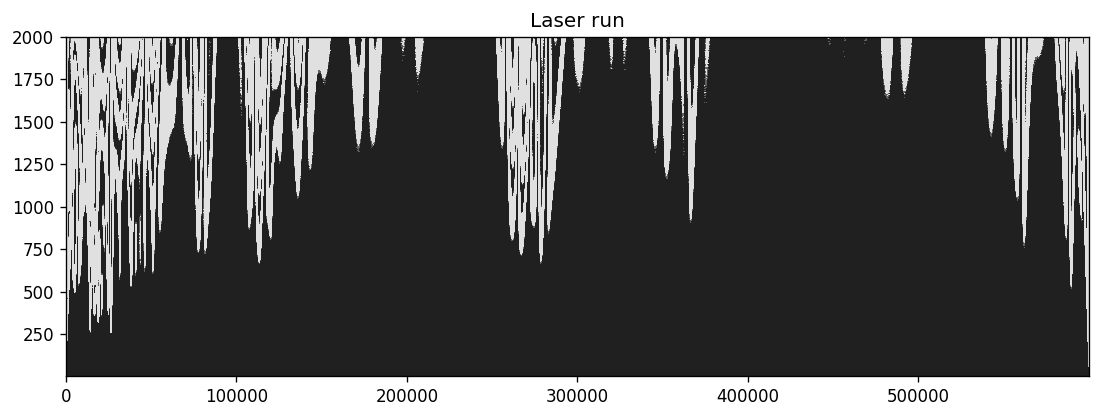

In [11]:
h = cf.PlotFingerPrint([FullFP1,'Laser run'])

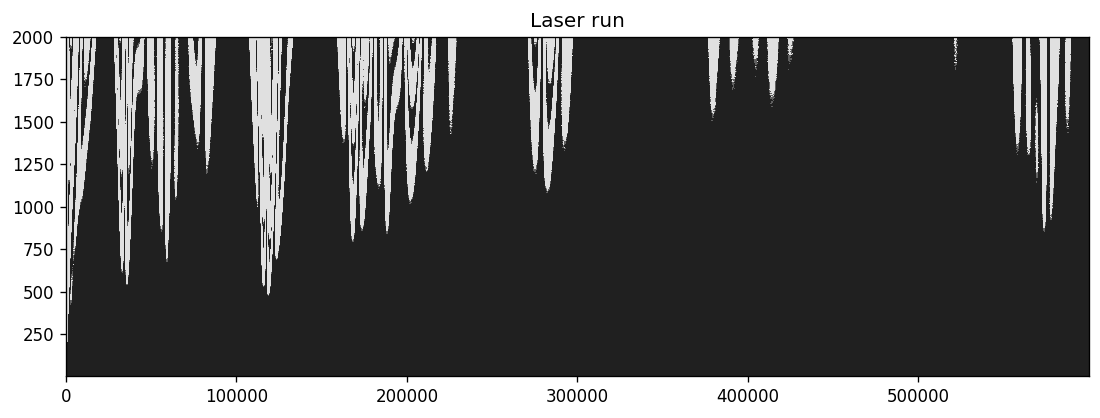

In [12]:
hh = cf.PlotFingerPrint([FullFP2,'Laser run'])


In [13]:
filteredDataSet = cf.KalmanGroup(DataSet)
FullFP1 = cf.getThumbprint2(filteredDataSet[:,0], 'db3',2000,5)
FullFP2 = cf.getThumbprint2(filteredDataSet[:,2], 'db3',2000,5)

In [ ]:
h1= cf.PlotFingerPrint([FullFP1,'Laser run'])
h2 = cf.PlotFingerPrint([FullFP2,'Laser run'])

In [ ]:
SubtractData = np.subtract(DataSet[0,:],DataSet[1,:])
SubtractData = cf.KalmanFilterDenoise(SubtractData)
sdfp = cf.getThumbprint2(SubtractData, 'db3', 2000,5)
hs = cf.PlotFingerPrint([sdfp, 'Delta Distance'])

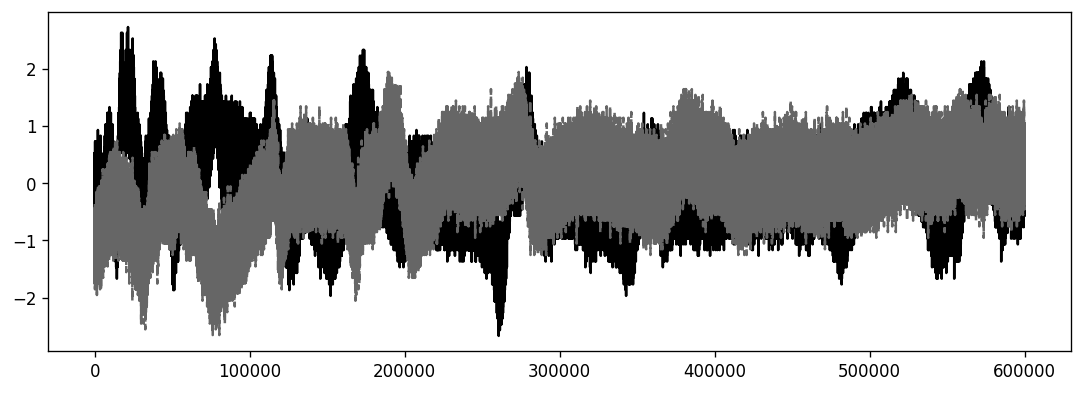

In [ ]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(DataSet[0,:])
plt.plot(DataSet[1,:])
plt.plot(SubtractData)
#plt.plot(DataSet[3,:])
plt.show()